In [1]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import pandas as pd
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import cmasher as cmr


In [2]:
df_edges = pd.read_csv("csv_outputs/graph_channels_large.csv", sep=';')
df_edges = df_edges.drop(df_edges[df_edges.weight < 16].index)
#df_edges.loc[df_edges[df_edges.weight < 16].index, 'weight'] = 16
display(df_edges.head())


,source,target,weight
0,0,1,12881
1,0,2,8482
2,0,3,20346
3,0,4,14911
5,0,6,1268


In [3]:
G = nx.from_pandas_edgelist(df_edges, edge_attr=True)
G.remove_nodes_from(list(nx.isolates(G)))
remove = [node for node,degree in dict(G.degree()).items() if degree <41]
G.remove_nodes_from(remove)
print(len(G.nodes))
#print(sorted(G.degree, key=lambda x: x[1], reverse=True))
list(nx.isolates(G))


1677


[]

In [4]:
louvain_partitions = nx_comm.louvain_communities(G, resolution=1.2, threshold=1e-1,seed=1)
print("We have {nbr}".format(nbr=len(louvain_partitions)))

We have 8


In [5]:
for idx in range(len(louvain_partitions)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_partitions[idx])))

Community number 0 has 333 members
Community number 1 has 2 members
Community number 2 has 139 members
Community number 3 has 320 members
Community number 4 has 2 members
Community number 5 has 191 members
Community number 6 has 260 members
Community number 7 has 430 members


0 - ok
1 - ok
2 - ok
3 - not ok
4 - not ok
5 - ok
6 - not ok
7 - ok


In [6]:
display(louvain_partitions[2])

{23,
 64,
 101,
 202,
 207,
 211,
 238,
 259,
 308,
 310,
 328,
 353,
 386,
 403,
 446,
 468,
 484,
 485,
 499,
 517,
 525,
 557,
 567,
 583,
 612,
 640,
 668,
 673,
 675,
 696,
 703,
 715,
 725,
 735,
 747,
 756,
 770,
 790,
 796,
 802,
 803,
 815,
 824,
 857,
 859,
 927,
 951,
 955,
 980,
 993,
 1004,
 1005,
 1018,
 1027,
 1035,
 1056,
 1064,
 1084,
 1089,
 1090,
 1091,
 1147,
 1163,
 1168,
 1196,
 1210,
 1216,
 1292,
 1302,
 1334,
 1336,
 1341,
 1347,
 1348,
 1361,
 1380,
 1416,
 1418,
 1420,
 1427,
 1518,
 1536,
 1538,
 1550,
 1554,
 1595,
 1601,
 1612,
 1616,
 1618,
 1638,
 1640,
 1670,
 1679,
 1682,
 1685,
 1696,
 1720,
 1733,
 1736,
 1757,
 1764,
 1791,
 1807,
 1812,
 1814,
 1820,
 1836,
 1852,
 1862,
 1866,
 1901,
 1913,
 1925,
 1933,
 1939,
 1949,
 1970,
 1977,
 1980,
 2010,
 2044,
 2070,
 2091,
 2107,
 2109,
 2123,
 2134,
 2153,
 2157,
 2161,
 2165,
 2177,
 2190,
 2208,
 2225,
 2227,
 2240,
 2251}

In [7]:
forceatlas2 = ForceAtlas2(gravity=0)
posses = forceatlas2.forceatlas2_networkx_layout(G,iterations=1000)

100%|██████████| 1000/1000 [00:26<00:00, 37.17it/s]

BarnesHut Approximation  took  10.52  seconds
Repulsion forces  took  9.84  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  5.68  seconds
AdjustSpeedAndApplyForces step  took  0.31  seconds


In [8]:
dict_col={0 : 0, 1 : 0, 2 : 0, 3 : 1, 4 : 1, 5 : 0, 6 : 1, 7 : 0}
mapping = {}
for i, l in enumerate(louvain_partitions):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] = dict_col.get(i)
        #mapping[elem] = i

for n in G.nodes:
    G.nodes[n]["louvain"] = mapping[n]


cmap = cmr.get_sub_cmap('bwr', 0, 1, N=2)

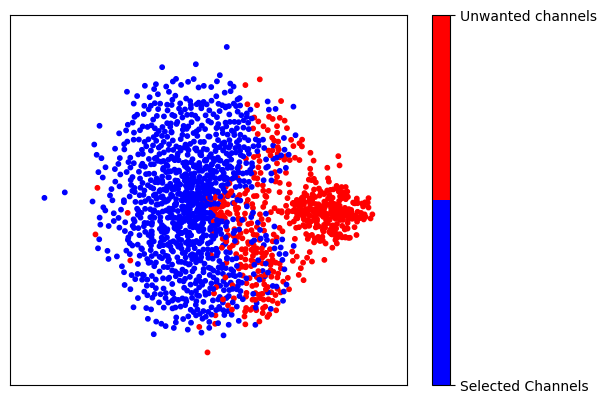

In [9]:
nc = nx.draw_networkx_nodes(G, node_size=10, node_color=[G.nodes[n]["louvain"] for n in G.nodes], cmap=cmap, pos=posses)
ec = nx.draw_networkx_edges(G, width=0.0000, pos=posses)

#nx.draw_networkx(G, node_size=10, node_color=[G.nodes[n]["louvain"] for n in G.nodes], cmap='bwr', with_labels=False, width=0.0005,pos=posses)
cb = plt.colorbar(nc, ticks=[0,1])
#cb = plt.colorbar(nc)

yt = cb.ax.set_yticklabels(['Selected Channels', 'Unwanted channels'])


In [10]:
filtered_channels = list(louvain_partitions[0])
filtered_channels = filtered_channels + (list(louvain_partitions[1]))
filtered_channels = filtered_channels + (list(louvain_partitions[2]))
filtered_channels = filtered_channels + (list(louvain_partitions[5]))
filtered_channels = filtered_channels + (list(louvain_partitions[7]))

filtered_channels = sorted(filtered_channels)
print("We have {nbr} channels left".format(nbr=len(filtered_channels)))
filtered_channels_list = filtered_channels
filtered_channels = pd.DataFrame(filtered_channels)
display(filtered_channels.head())

We have 1095 channels left


,0
0,6
1,7
2,9
3,10
4,11


In [11]:
filtered_channels.to_csv("csv_outputs/louvain_filtered_channels_large_fix.csv", sep=';', index=False)

In [12]:
def filter_function(n):
    return n in filtered_channels_list

sub_G = nx.subgraph_view(G, filter_node=filter_function)

In [13]:
louvain_communities = nx_comm.louvain_communities(sub_G, resolution=1.1,threshold=1e-1, seed=1)
print("We have detected {num} communities".format(num=len(louvain_communities)))

We have detected 7 communities


In [14]:
for idx in range(len(louvain_communities)):
    print("Community number {i} has {number} members".format(i=idx,number=len(louvain_communities[idx])))

Community number 0 has 341 members
Community number 1 has 140 members
Community number 2 has 104 members
Community number 3 has 255 members
Community number 4 has 98 members
Community number 5 has 155 members
Community number 6 has 2 members


- 0 CNN, Truly --> lean left
- 1 TYT  --> left
- 2 youtube spotlight UK, AP archive
- 3  White House, Jason A(événements d'aujourd'hui qui ont un rapport avec la bible), AMTV
- 4 Philipp de Franco, Paul Joseph Watson, Sourcefed
- 5 Daily Wire, Mark Dice --> Right
- 6 LiveNow from Fox, NPR


In [15]:
display(louvain_communities[1])

{23,
 64,
 101,
 153,
 202,
 207,
 211,
 238,
 259,
 310,
 328,
 353,
 386,
 403,
 446,
 468,
 484,
 485,
 499,
 517,
 525,
 557,
 567,
 583,
 612,
 640,
 668,
 673,
 675,
 696,
 703,
 715,
 725,
 735,
 747,
 756,
 770,
 790,
 796,
 802,
 803,
 824,
 857,
 859,
 927,
 951,
 955,
 980,
 993,
 1004,
 1005,
 1018,
 1027,
 1035,
 1056,
 1064,
 1084,
 1089,
 1090,
 1091,
 1147,
 1163,
 1168,
 1196,
 1210,
 1216,
 1251,
 1292,
 1302,
 1334,
 1336,
 1341,
 1347,
 1348,
 1361,
 1380,
 1416,
 1418,
 1420,
 1421,
 1427,
 1508,
 1518,
 1536,
 1538,
 1550,
 1595,
 1601,
 1612,
 1616,
 1618,
 1638,
 1640,
 1670,
 1679,
 1682,
 1685,
 1696,
 1720,
 1733,
 1736,
 1757,
 1764,
 1791,
 1807,
 1812,
 1814,
 1836,
 1852,
 1862,
 1866,
 1901,
 1913,
 1925,
 1933,
 1939,
 1949,
 1970,
 1977,
 1980,
 1990,
 2010,
 2044,
 2070,
 2091,
 2108,
 2109,
 2123,
 2134,
 2157,
 2161,
 2165,
 2177,
 2190,
 2208,
 2225,
 2227,
 2236,
 2240,
 2251}

In [16]:
#louvain_communities[0], louvain_communities[1] = louvain_communities[1], louvain_communities[0]
mapping = {}
for i, l in enumerate(louvain_communities):
    list_ = list(l)
    list_.sort()
    for elem in list_:
        mapping[elem] =i

for n in sub_G.nodes:
    sub_G.nodes[n]["louvain"] = mapping[n]





#print(mapping)

In [17]:
#pos = nx.shell_layout(sub_G)
pos_dict ={0: (0,0), 1: (-100, 0), 2: (-150, 0), 3: (-200, -100), 4:(-100 ,-100),5:(0, -100), 6:(-100, -100) }
pos ={x : pos_dict.get(sub_G.nodes[x]["louvain"]) for x in sub_G.nodes}

In [18]:
forceatlas2 = ForceAtlas2(gravity=0.0000, scalingRatio=1.5, edgeWeightInfluence=0.5, outboundAttractionDistribution=False)
posses = forceatlas2.forceatlas2_networkx_layout(sub_G,iterations=1000)

100%|██████████| 1000/1000 [00:20<00:00, 49.56it/s]

BarnesHut Approximation  took  2.14  seconds
Repulsion forces  took  3.38  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  14.07  seconds
AdjustSpeedAndApplyForces step  took  0.20  seconds


In [19]:
cmap = cmr.get_sub_cmap('CMRmap', 0.15, 0.95, N=len(louvain_communities))

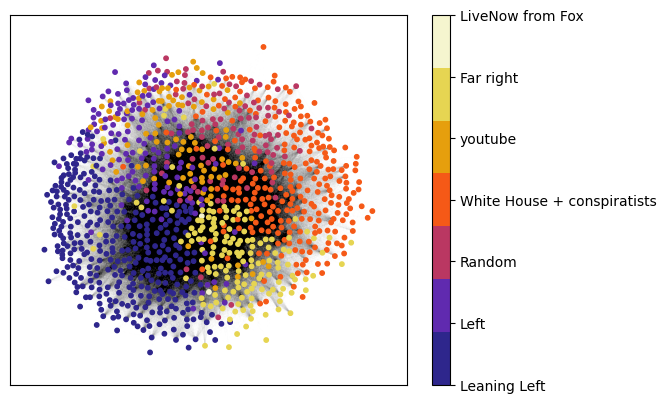

In [20]:
nc = nx.draw_networkx_nodes(sub_G, pos=posses, node_size=10, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=cmap)
ec = nx.draw_networkx_edges(sub_G, pos=posses, width=0.0005)
#nx.draw_networkx_labels(sub_G, pos=posses)
#nx.draw_networkx(sub_G, pos=posses, with_labels=False, width=0,node_size=0.5, node_color=[sub_G.nodes[n]["louvain"] for n in sub_G.nodes], cmap=plt.cm.bwr)

cb = plt.colorbar(nc, ticks=[0,1,2,3,4,5,6])
#cb = plt.colorbar(nc)

yt = cb.ax.set_yticklabels(['Leaning Left', 'Left','Random', 'White House + conspiratists', 'youtube', 'Far right', 'LiveNow from Fox'])


In [21]:
a0 =list(louvain_communities[0])
a1 =list(louvain_communities[1])
a2 =list(louvain_communities[2])
a3 =list(louvain_communities[3])
a4 =list(louvain_communities[4])
a5 =list(louvain_communities[5])

b0 = list(np.full_like(a0,0))
b1 = list(np.full_like(a1,1))
b2 = list(np.full_like(a2,2))
b3 = list(np.full_like(a3,3))
b4 = list(np.full_like(a4,4))
b5 = list(np.full_like(a5,5))


In [22]:
communities=a0 + a1 + a2 + a3 + a4 + a5
indices = b0 + b1 + b2 + b3 + b4 + b5

In [23]:
d = {'channel': communities, 'community': indices}
df = pd.DataFrame(data=d)
display(df.head())

,channel,community
0,2049,0
1,1028,0
2,6,0
3,7,0
4,9,0


In [24]:
df.to_csv("csv_outputs/louvain_communities_channels_large.csv", sep=';', index=False)